<a href="https://colab.research.google.com/github/Josephnyingi/Clime/blob/main/Clime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load data into pandas dataframe
2. Train model using Facebook Prophet
3. Make future dataframes and forecast forward.

#Import necessary Libaries

In [3]:
!pip install prophet -q

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error




#Load the data into pandas dataframe

In [5]:
weather = pd.read_csv("/content/Forecast_Dataset-1.51S37.27E1627m.csv.csv", index_col= "DATE")
weather
#Date is used as our Index (ID)

,TEMPERATURE,RAIN
DATE,,
2022-12-04,17.4,1.5
2022-12-05,18.0,2.4
2022-12-06,18.6,0.8
2022-12-07,18.7,0.7
2022-12-08,18.0,1.5
...,...,...
2024-12-14,19.9,1.0
2024-12-15,19.8,0.8
2024-12-16,19.2,1.7


#Clean the data

In [6]:
# Get rid of missing values
# Calculate null percentage
null_percentage = weather.isnull().sum()/weather.shape[0]
null_percentage




,0
TEMPERATURE,0.0
RAIN,0.0


The data has no null values

In [7]:
# Checking data type
# we want to make sure all the values are of same data type
weather.dtypes



,0
TEMPERATURE,float64
RAIN,float64


In [8]:
#Check index dtype correct row type
weather.index

Index(['2022-12-04', '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
       '2022-12-09', '2022-12-10', '2022-12-11', '2022-12-12', '2022-12-13',
       ...
       '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12', '2024-12-13',
       '2024-12-14', '2024-12-15', '2024-12-16', '2024-12-17', '2024-12-18'],
      dtype='object', name='DATE', length=746)

In [9]:
# convert  indexdtype from object to datetime
weather.index = pd.to_datetime(weather.index)
weather.index


DatetimeIndex(['2022-12-04', '2022-12-05', '2022-12-06', '2022-12-07',
               '2022-12-08', '2022-12-09', '2022-12-10', '2022-12-11',
               '2022-12-12', '2022-12-13',
               ...
               '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12',
               '2024-12-13', '2024-12-14', '2024-12-15', '2024-12-16',
               '2024-12-17', '2024-12-18'],
              dtype='datetime64[ns]', name='DATE', length=746, freq=None)

In [10]:
# Getting the year component our date
weather.index.year


Index([2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=746)

In [11]:
# checking for gaps in data
weather.index.year.value_counts().sort_index()


,count
DATE,
2022,28
2023,365
2024,353


In 2022, the data downloaded was from early days December 28 days to the end of that year. However, there are gaps in 2024, as the data was not available towards the end of December that year.

# Exploratory Data Analysis (EDA)

<Axes: xlabel='DATE'>

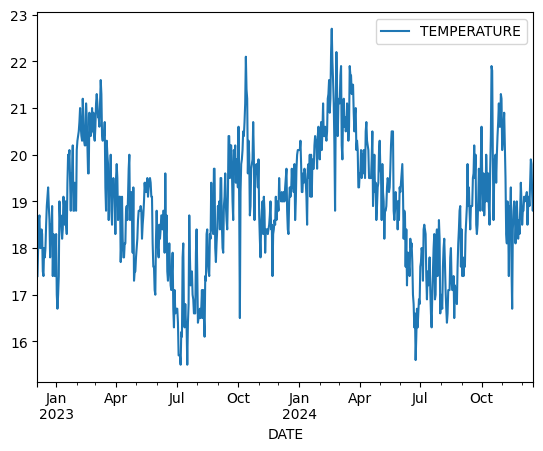

In [12]:
# Plotting Temperature column
weather.plot(y="TEMPERATURE")


<Axes: xlabel='DATE'>

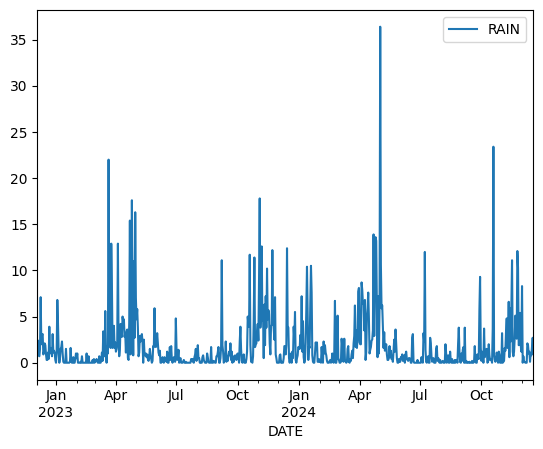

In [13]:
# Plotting the Rain column
weather.plot(y="RAIN")


In [14]:
weather

,TEMPERATURE,RAIN
DATE,,
2022-12-04,17.4,1.5
2022-12-05,18.0,2.4
2022-12-06,18.6,0.8
2022-12-07,18.7,0.7
2022-12-08,18.0,1.5
...,...,...
2024-12-14,19.9,1.0
2024-12-15,19.8,0.8
2024-12-16,19.2,1.7
